<a href="https://colab.research.google.com/github/srijani-mitra/Credit-Risk-Analysis/blob/main/Credit_Risk_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

In [2]:
df = pd.read_csv('/content/bankloans.csv')
df.head()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.359392,5.008608,1.0
1,27,1,10,6,31,17.3,1.362202,4.000798,0.0
2,40,1,15,14,55,5.5,0.856075,2.168925,0.0
3,41,1,15,14,120,2.9,2.658720,0.821280,0.0
4,24,2,2,0,28,17.3,1.787436,3.056564,1.0


In [3]:
df.isnull().sum()

,0
age,0
ed,0
employ,0
address,0
income,0
debtinc,0
creddebt,0
othdebt,0
default,450


In [4]:
df.value_counts()

age  ed  employ  address  income  debtinc  creddebt  othdebt   default
56   1   11      20       59      15.0     4.672800  4.177200  0.0        1
20   1   4       0        14      9.7      0.200984  1.157016  1.0        1
     3   0       1        17      2.3      0.043792  0.347208  0.0        1
21   1   1       1        16      6.3      0.141120  0.866880  0.0        1
                          18      17.3     0.158814  2.955186  0.0        1
                                                                         ..
22   1   4       3        14      17.5     0.225400  2.224600  0.0        1
                 2        24      15.6     1.636128  2.107872  1.0        1
                 1        16      1.2      0.084480  0.107520  0.0        1
         1       3        17      18.6     0.806310  2.355690  0.0        1
                 0        18      4.4      0.270072  0.521928  0.0        1
Name: count, Length: 700, dtype: int64

In [5]:
df = df.dropna()

In [26]:
df.describe()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
count,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,34.860000,1.722857,8.388571,8.278571,45.601429,10.260571,1.553553,3.058209,0.261429
std,7.997342,0.928206,6.658039,6.824877,36.814226,6.827234,2.117197,3.287555,0.439727
min,20.000000,1.000000,0.000000,0.000000,14.000000,0.400000,0.011696,0.045584,0.000000
25%,29.000000,1.000000,3.000000,3.000000,24.000000,5.000000,0.369059,1.044178,0.000000
50%,34.000000,1.000000,7.000000,7.000000,34.000000,8.600000,0.854869,1.987567,0.000000
75%,40.000000,2.000000,12.000000,12.000000,55.000000,14.125000,1.901955,3.923065,1.000000
max,56.000000,5.000000,31.000000,34.000000,446.000000,41.300000,20.561310,27.033600,1.000000


<Axes: xlabel='age', ylabel='income'>

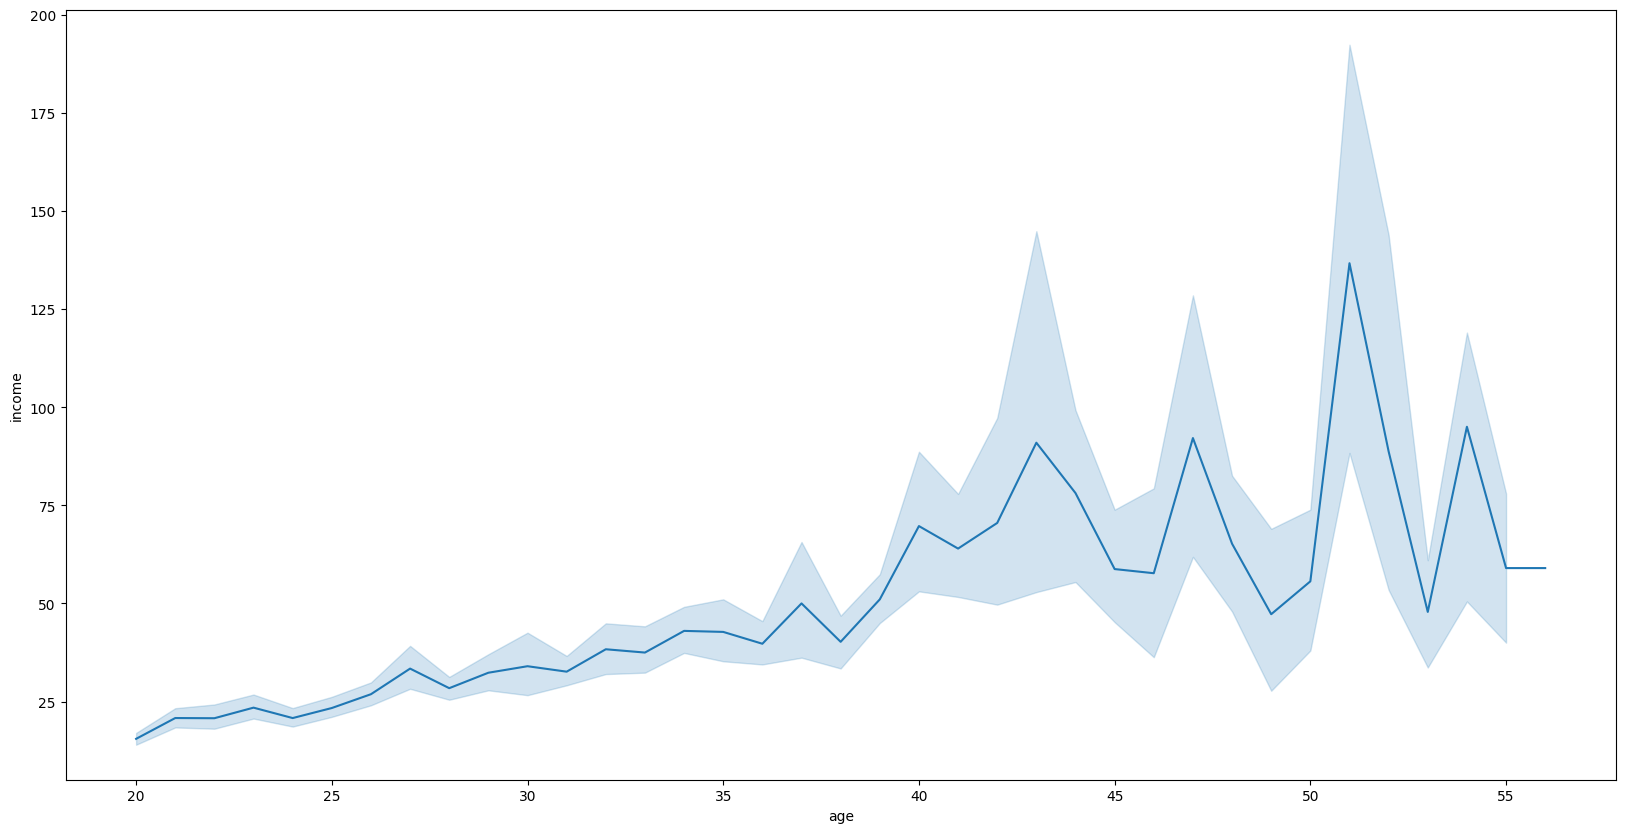

In [6]:
fig,ax = plt.subplots(figsize=(20,10))
sns.lineplot(x='age',y='income',data=df,ax=ax)

<Axes: xlabel='age', ylabel='debtinc'>

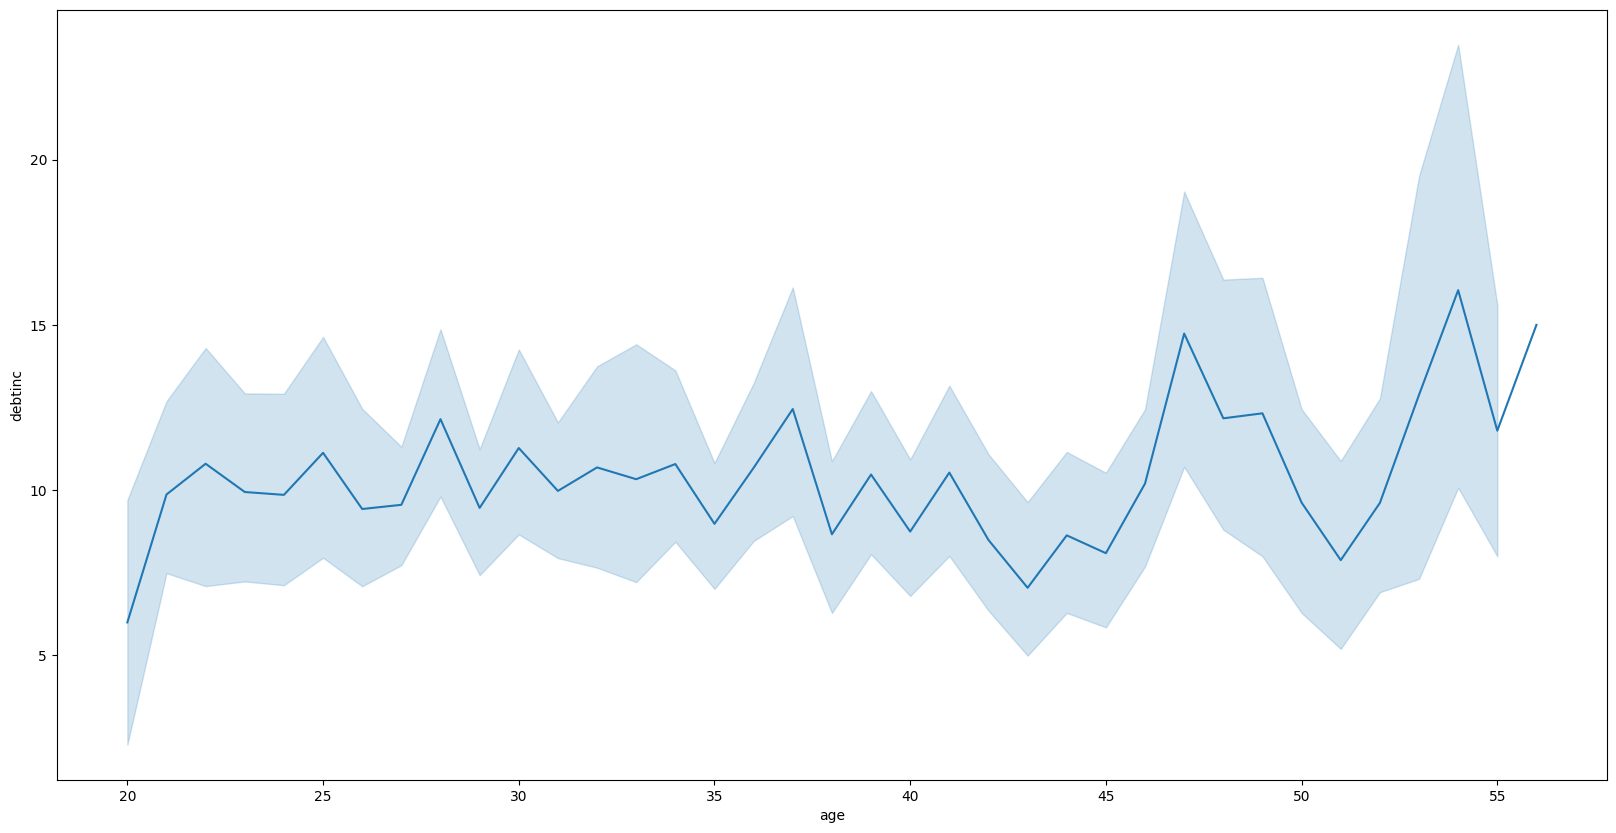

In [7]:
fig,ax = plt.subplots(figsize=(20,10))
sns.lineplot(x='age',y='debtinc',data=df,ax=ax)

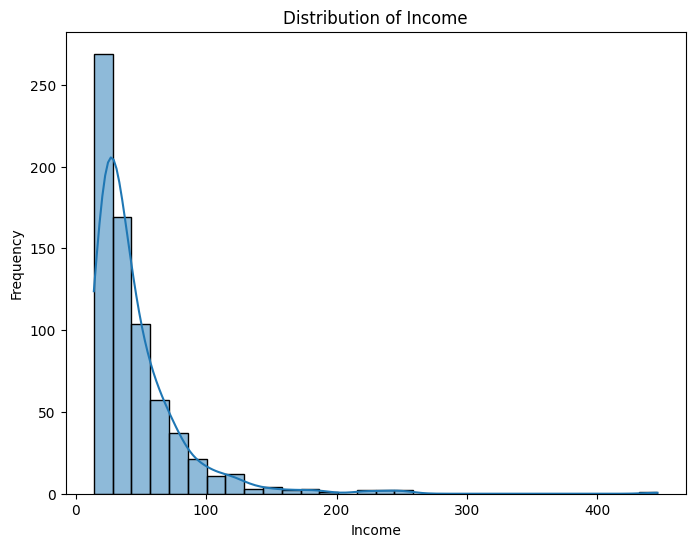

In [30]:
plt.figure(figsize=(8, 6))
sns.histplot(df['income'], bins=30, kde=True)
plt.title('Distribution of Income')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()

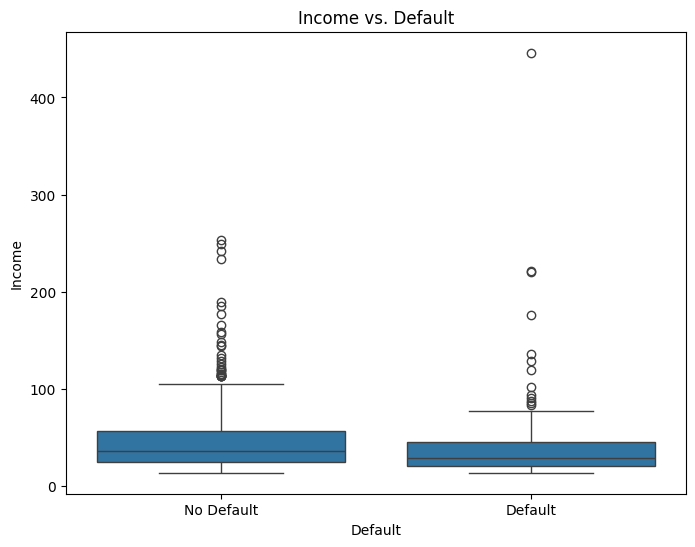

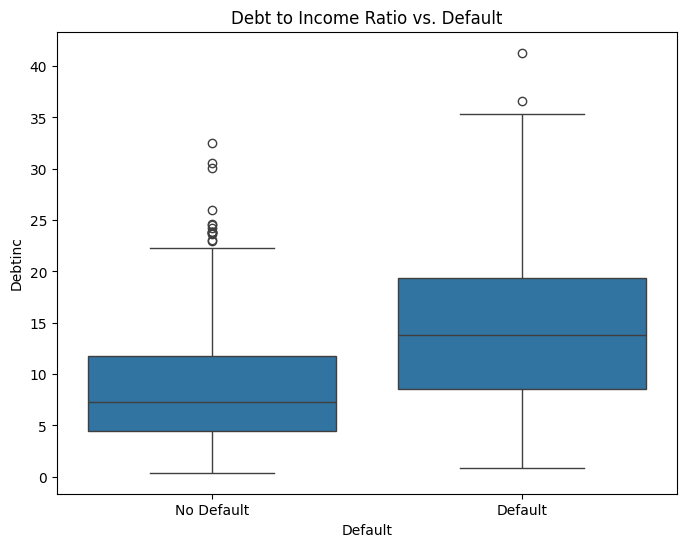

In [34]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='default', y='income', data=df)
plt.title('Income vs. Default')
plt.xlabel('Default')
plt.ylabel('Income')
plt.xticks([0, 1], ['No Default', 'Default'])
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(x='default', y='debtinc', data=df)
plt.title('Debt to Income Ratio vs. Default')
plt.xlabel('Default')
plt.ylabel('Debtinc')
plt.xticks([0, 1], ['No Default', 'Default'])
plt.show()

In [8]:
df['default'].value_counts()

,count
default,
0.0,517
1.0,183


In [9]:
x=df.drop(['default'],axis=1)
y=df['default']

In [10]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=42)

In [11]:
sc = StandardScaler()
xtrain=sc.fit_transform(xtrain)
xtest=sc.fit_transform(xtest)

**Creating RandomForest Model**

In [12]:
rfc = RandomForestClassifier(n_estimators=200)

In [13]:
rfc.fit(xtrain,ytrain)

RandomForestClassifier(n_estimators=200)

In [14]:
rfc.score(xtest,ytest)

0.8

In [15]:
rfc2 = cross_val_score(estimator=rfc,X=xtrain,y=ytrain,cv=10)
rfc2.mean()

np.float64(0.7910714285714285)

**Creating Model SVM**

In [16]:
sv = SVC()
sv.fit(xtrain,ytrain)

SVC()

In [17]:
sv.score(xtest,ytest)

0.7928571428571428

In [18]:
model = GridSearchCV(sv,{
    'C':[0.1,0.2,0.4,0.8,1.2,1.8,4.0,7.0],
    'gamma':[0.1,0.4,0.8,1.0,2.0,3.0],
    'kernel':['rbf','linear']
},scoring='accuracy',cv=10)

In [19]:
model.fit(xtrain,ytrain)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.1, 0.2, 0.4, 0.8, 1.2, 1.8, 4.0, 7.0],
                         'gamma': [0.1, 0.4, 0.8, 1.0, 2.0, 3.0],
                         'kernel': ['rbf', 'linear']},
             scoring='accuracy')

In [20]:
model.best_params_

{'C': 0.1, 'gamma': 0.1, 'kernel': 'linear'}

In [21]:
model2 = SVC(C=0.1,gamma=0.1,kernel='linear')
model2.fit(xtrain,ytrain)
model2.score(xtest,ytest)

0.8214285714285714

**Creating Model Logistic Regression**

In [22]:
lr = LogisticRegression()
lr.fit(xtrain,ytrain)
lr.score(xtest,ytest)

0.8357142857142857

Text(0.5, 1.0, 'Confusion Matrix')

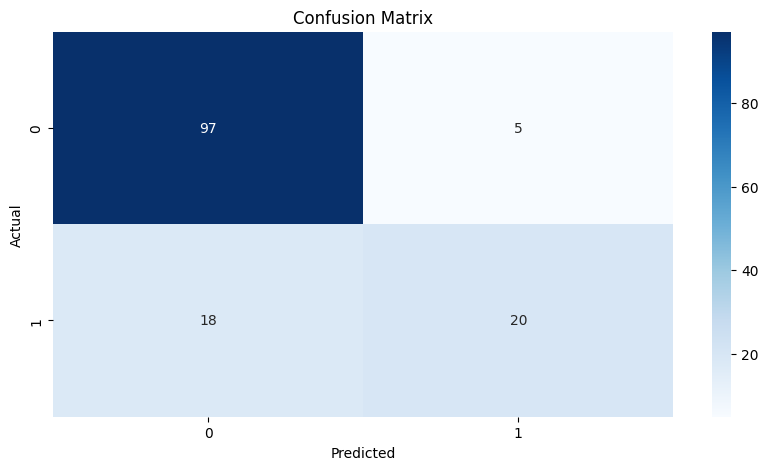

In [27]:
yp = lr.predict(xtest)
c = confusion_matrix(ytest, yp)
fig, ax = plt.subplots(figsize=(10, 5))
sns.heatmap(c, annot=True, fmt='d', cmap='Blues', ax=ax)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_title('Confusion Matrix')